# General landscape of machine learning

## Machine Learning (ML)

Machine learning is the science of using computer to predict outcomes without being explicitly programmed.
The basic idea behind machine learning is to build algorithms based on statistical analysis that takes input data and predict an output value or response. In order to create a model we have to chose type of model that fits to our problem and subsequently we **train** the model using **training data**. 

There are two main types of ML algorithms: **supervised** and **unsupervised**. 
In **supervised algorithms**  requires both input and known output during the process of training. Once training is completed, the model can be used to a new dataset to predict outcome.
**Unsupervised algorithms** do not require output in the process of training, they are used to discover pattern in the data.

Second main distinction between models is related to type of output. Your output can take **continuous** values, e.g., house price, IQ score, or can take **categorical** values, e.g. spam or not spam email, malignant or benign tumor.

Therefore, there are four main types of problems in ML:


<img src="../img/superv_unsuperv.png", width=600>

## Scikit-learn

[Scikit-learn](http://scikit-learn.org/stable/) is a great Python library that allows for ease use the standard machine learning algorithms. It is also build on top of other commonly used scientific libraries like NumPy, SciPy, and matplotlib.
Below there is a scikit-learn cheat sheet that again addresses the main classification of ML algorithms and can be used as a rough guide on how to approach problems.

<img src="../img/scikit-type.png", width=800>

Let's try to import sklearn and check some available datasets. 

In [1]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

X_can = cancer.data
y_can = cancer.target

print(X_can.shape)
print(y_can.shape)

(569, 30)
(569,)


You can see that input data ``X`` is a 2-dimensional array and the output (or response) is a one dimensional array. We can say that ``569`` is a number of examples and ``30`` is a number of features.

For this dataset there we can also access a short description:

In [2]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

You can see name od all features and two output classes. So we expect that the response vector will have 2 values only and we can easily check it:

In [3]:
import numpy as np
np.unique(y_can)

array([0, 1])

``datasets`` offers also a dataset generator. Let's try to generate and plot data with 30 samples and 1 feature:

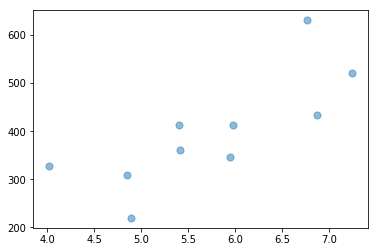

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

X, y = datasets.make_regression( n_samples=10, n_features=1, n_informative=1, random_state=0, noise=75)
# just to have positive values only 
X = X + 5 
y = y + 300

plt.scatter(X[:,0], y, s=50, alpha=0.5) 

## Linear regression 

Linear Regression is the most common algorithm for supervised learning if the output is continuous. The algoritm solves **optimization problem**, it minimizes the following cost function:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left(\hat{y}^i - y^{i} \right)^2$$ , 

where $y^{i}$ is the true value and $\hat{y}$ is a predicted value that can be written:

$$\hat{y}^i = \theta_0 + \theta_1 x_1^i + \theta_2 x_2^i + ...$$

$x^i_n$ represents the value of features for $i$ sample and $\theta_n$ are parameters of the linear model, that are derived to minimize the cost function. 

We can use the matrix form (a column of ones is usually added to input matrix $X$ to multiply $\theta_0$):

$$\hat{y} = X \theta$$

We can now use ``LinearRegression`` model implemented in sikit-learn to fit to the generated data that has only one feature. The data will be used as training data to build the model:

In [5]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now, we can check the parameters of the model $\theta_0$ and $\theta_1$:

In [6]:
print(regr.intercept_, regr.coef_)

-101.227722515 [ 86.95002577]


We can now check what our model predict for the input data:

And plot again training data with fitted function:

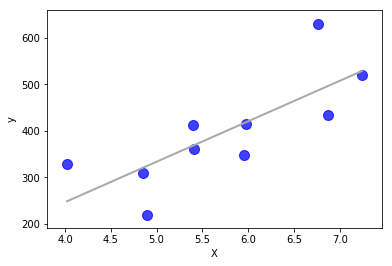

In [7]:
def plot_regr(X, y, model, color="b"):
    fig, ax = plt.subplots()
    
    X_pr = np.linspace(X[:,0].min(), X[:,0].max(), 100)[:, np.newaxis]
    y_pr = model.predict(X_pr)
    ax.plot(X_pr, y_pr, color='darkgrey', linewidth=2)
    ax.scatter(X[:,0], y, s=100, alpha=0.75, c=color)

    #ax.set_title("model score = {:03.2f}".format(model.score(X,y)))
    ax.set_xlabel('X')
    ax.set_ylabel('y')

plot_regr(X, y, regr)

### Exercise 1

We can also use ``LinearRegression`` to multi-feature data. Create a dataset that has 5 features. Calculate the coefficients and plot response vs the first feature, plot also the fitted line. 

## Classification

For categorical output you can use another regression model called [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

However, we will show another type of models - [K-nearest neigbor classifier](http://scikit-learn.org/stable/modules/neighbors.html#classification)
The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. 

We can use classification algorithm to create model for the data we saw previously. Let's plot first:

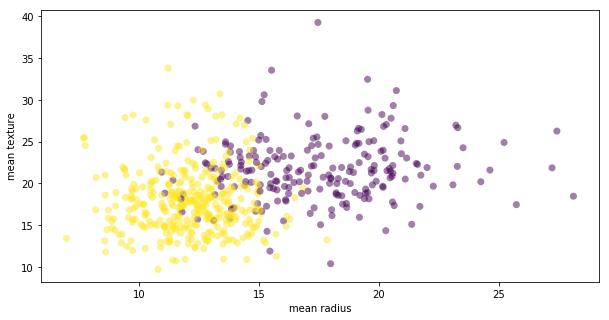

In [40]:
colors = plt.rcParams['axes.prop_cycle']
def plotXY(X, y, feat_x=0, feat_y=1):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(X[:, feat_x ], X_can[:, feat_y], c=y, s=50, alpha=0.5, edgecolor='none')
    ax.set_xlabel(cancer.feature_names[feat_x])
    ax.set_ylabel(cancer.feature_names[feat_y])
plotXY(X_can, y_can)

As you can see, the data point are not separable, but it's clear that the mean radius is an important factor to distinguish between two types of cancer. 

Now let's try to use scikit-learn implementation of [K-neigbors model](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) with default parameters (i.e. 5 nearest neighbors, Minkowski metric). We will use only 2 features that we plotted: mean texture and mean radius.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_can[:, :2], y_can)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Now, let's plot again our data points together with results of our model. We will ask for probability estimates for the test data point for the interesting range and divide results to two group to plot a border between area that the model identifies with malignant and benign tumor. 

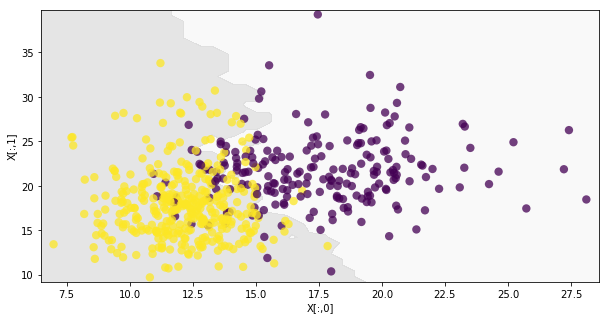

In [11]:
def plot_Kneig(clf, X, y):
    h = 50
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                         np.linspace(y_min, y_max, h))

    clf.fit(X, y)
    # probability estimates for the test data 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10,5))
    # plotting two areas for p<0.5 and p>0.5 to get a 
    ax.contourf(xx, yy, Z, alpha=0.15, levels=[0,0.5,1], cmap=plt.cm.Greys)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, alpha=0.75, edgecolor='none')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X[:,0]')
    ax.set_ylabel('X[:,1]')
plot_Kneig(clf, X_can[:, :2], y_can)

As you can see the model did a pretty good job for separating these two regions.

### Exercise 2

Run a classification for Iris data available in ``datasets``. You can try to run model twice, first time using 2 features that have high correlation with output and second time with two less correlated features. You might also read and change parameters of the ``KNeighborsClassifier``.


## Clustering: K means
K-means algorithm is an unsupervised algorithm and clusters data by trying to separate samples in n groups of equal variance. This algorithm requires the number of clusters to be specified. 

To show what this algorithm can achieve, let's load dataset with hand-written digits:

In [12]:
digits = datasets.load_digits()
X_dig = digits.data
y_dig = digits.target

print(digits.DESCR) 

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

Let's check the size of our input data:

In [13]:
X_dig.shape

(1797, 64)

So we have 1797 samples, each has 64 features (representing pixels). We can plot our data after sorting output labels:


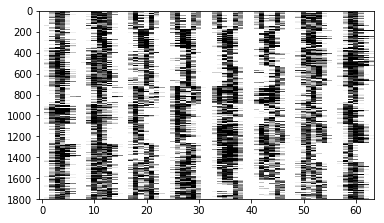

In [14]:
plt.imshow(X_dig[np.argsort(y_dig),], aspect=0.02, cmap=plt.cm.gray_r)
plt.show()

It's hard to see anything interesting, but we will try to use K-mean algorithm to cluster those samples in 10 clusters in 64-dimensional space.

In [15]:
from sklearn.cluster import KMeans
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

We see now that we identified 10 cluster centers in 64 dimensions. Let's see how they look like:

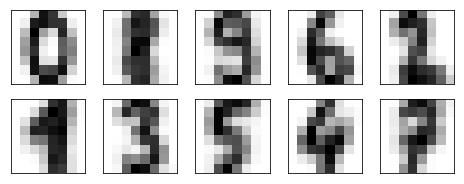

In [16]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)


You see that they look very much like digits from 0 to 9 (probably except 8) and algorithm was able to identify them without knowing about labels (output data). Of course crucial for this example was the number of clusters that was easy to provide.

Let's check the accuracy of the model by comparing with labels that we have in our dataset. We should only first change the order of our clusters:

In [17]:
from scipy.stats import mode

model_labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    model_labels[mask] = mode(digits.target[mask])[0]

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, model_labels)

0.79243183082915969

So the accuracy of our simple model is 80%.

One question that we might ask, if it was really needed to have all 64 dimensions, maybe we can reduce our data to 16 dimensions? Of course if we provide only left quater of all images the algorithm will not identify numbers correctly. But we might be able to identify vectors in these 64-dimensional space that are "more important" than others.

## Principal Component Analysis (PCA)

[PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) is an algorithm that identifies most importan components in our n-dimensional spaces. Let's see the very easy examples in 2D:

<img src="../img/pca.png", width=400>

You can see that one direction is more important to describe the data, and by "more important" we mean that it explain most variance. 

We will try to use PCA to our digit dataset

Let's see again how the data looks like in 64 dimensions:

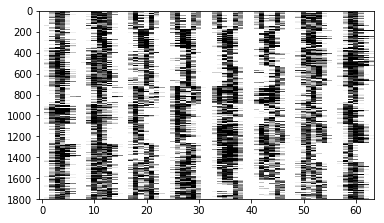

In [19]:
plt.imshow(X_dig[np.argsort(y_dig),], aspect=0.02, cmap=plt.cm.gray_r)
plt.show()

And now let's use PCA to identify the principle components:

(1797, 64)


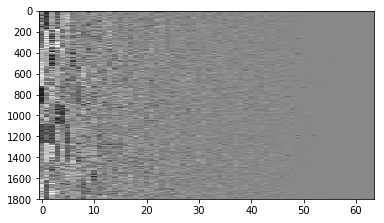

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=64).fit(X_dig)
X_reduced =pca.transform(X_dig)
print(X_reduced.shape)

plt.imshow(X_reduced[np.argsort(y_dig),], aspect=0.02, cmap=plt.cm.gray_r)

You can see that know the main variability is described by the first few components and we might really don't need them all.

Let's make a scatter plot taking only 2 first components:

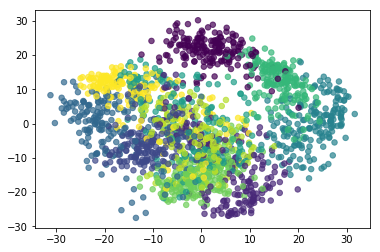

In [21]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_dig, s=30, alpha=0.7)

We can se that even if we can't fully separate data points associated to different digits, we can see that they are clustered.

Let's try to repeat K-means analysis taking only 16 dimensions/components this time:

(1797, 16)


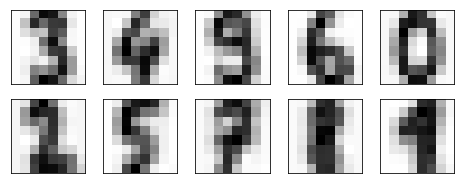

In [22]:
pca16 = PCA(n_components=16).fit(X_dig)
X_reduced16 =pca16.transform(X_dig)
print(X_reduced16.shape)

X_new = pca16.inverse_transform(X_reduced16)

est16 = KMeans(n_clusters=10)
clusters16 = est16.fit_predict(X_new)
centers16 = est16.cluster_centers_

fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est16.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)


In [23]:
model_labels16 = np.zeros_like(clusters16)
for i in range(10):
    mask = (clusters16 == i)
    model_labels16[mask] = mode(digits.target[mask])[0]    
    
accuracy_score(digits.target, model_labels16)   
    

0.79298831385642743

As you can see our accuracy decreased less than 1 percent.

### Exercise 3
Use PCA for the Iris dataset.

## Resources:

- many examples take from 
     - [Monte Lunacek tutorial](https://github.com/mlunacek/meetup_data_science_2016)
     - [Jake Vanderplas tutorial](https://github.com/jakevdp/sklearn_tutorial)